# Assignments: Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (Alarm Survey Data.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('../Data/Alarm Survey Data.xlsx')

In [4]:
df.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating           object
dtype: object

In [5]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars


In [6]:
df.alarm_rating = pd.to_numeric(df.alarm_rating.astype('str').str.replace("stars", ""))

In [7]:
df.number_of_children = df.number_of_children.astype('int')

In [8]:
df.dtypes

survey_id               int64
age                     int64
number_of_children      int32
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating            int64
dtype: object

In [9]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,light,3.0,3,3
2,3,18,0,light_activity,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,light_activity,1.0,4,3


## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   int32  
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6082 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 326.8+ KB


In [11]:
df[df.sleep_quality.isna() == True]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
10,11,28,2,light_activity,NaN,3,4
18,19,38,2,lightly active,NaN,1,5
23,24,24,2,very active,NaN,1,5
26,27,25,2,lightly active,NaN,1,2
28,29,29,2,lightly active,NaN,1,2
...,...,...,...,...,...,...,...
6310,6311,30,2,very active,NaN,0,3
6319,6320,44,2,lightly active,NaN,0,3
6375,6309,32,3,light,NaN,0,3
6377,6311,30,2,very active,NaN,0,3


In [12]:
df.sleep_quality.value_counts(dropna=False)

5.0    2721
4.0    2261
3.0     997
NaN     351
1.0     103
Name: sleep_quality, dtype: int64

In [13]:
df.sleep_quality.fillna(2, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   int32  
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6433 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 326.8+ KB


In [15]:
df.loc[10]

survey_id                         11
age                               28
number_of_children                 2
activity_level        light_activity
sleep_quality                    2.0
number_of_snoozes                  3
alarm_rating                       4
Name: 10, dtype: object

## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [16]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,light,3.0,3,3
2,3,18,0,light_activity,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,light_activity,1.0,4,3


In [17]:
df.age.describe() #ok

count    6433.000000
mean       29.069175
std         7.472048
min        13.000000
25%        23.000000
50%        28.000000
75%        34.000000
max        47.000000
Name: age, dtype: float64

In [18]:
df.number_of_children.describe() #ok

count    6433.000000
mean        1.379761
std         1.388768
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: number_of_children, dtype: float64

In [19]:
df.activity_level.value_counts()

active            2450
lightly active    2289
light_activity     691
very active        669
light              334
Name: activity_level, dtype: int64

In [20]:
activity_level_map = {
    "lightly active" : "lightly active",
    "light_activity" : "lightly active",
    "light" : "lightly active",
    "active" : "active",
    "very active": "very active"
}

In [21]:
df.activity_level = df.activity_level.map(activity_level_map)

In [22]:
df.activity_level.value_counts(dropna=False)

lightly active    3314
active            2450
very active        669
Name: activity_level, dtype: int64

In [23]:
df.sleep_quality.value_counts()

5.0    2721
4.0    2261
3.0     997
2.0     351
1.0     103
Name: sleep_quality, dtype: int64

In [24]:
df.number_of_snoozes.describe()

count    6433.000000
mean        1.145811
std         1.599481
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        19.000000
Name: number_of_snoozes, dtype: float64

In [25]:
df.alarm_rating.describe()

count    6433.000000
mean        2.955075
std         1.101363
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: alarm_rating, dtype: float64

## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [26]:
df[df.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6366,6300,31,2,active,5.0,0,3
6367,6301,27,2,lightly active,4.0,0,2
6368,6302,41,3,lightly active,5.0,0,2
6369,6303,25,0,lightly active,5.0,0,5
6370,6304,25,1,lightly active,5.0,0,2
...,...,...,...,...,...,...,...
6428,6362,27,2,active,5.0,0,5
6429,6363,31,1,lightly active,4.0,0,4
6430,6364,26,0,lightly active,5.0,0,3
6431,6365,27,1,active,5.0,0,3


In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df = df[~df.duplicated()]

In [30]:
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,lightly active,3.0,3,3
2,3,18,0,lightly active,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6361,6362,27,2,active,5.0,0,5
6362,6363,31,1,lightly active,4.0,0,4
6363,6364,26,0,lightly active,5.0,0,3
6364,6365,27,1,active,5.0,0,3


## 5. Outliers Check

* Find any outliers
* Deal with the outliers

In [31]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,lightly active,3.0,3,3
2,3,18,0,lightly active,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,lightly active,1.0,4,3


array([[<Axes: title={'center': 'survey_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'number_of_children'}>,
        <Axes: title={'center': 'sleep_quality'}>],
       [<Axes: title={'center': 'number_of_snoozes'}>,
        <Axes: title={'center': 'alarm_rating'}>]], dtype=object)

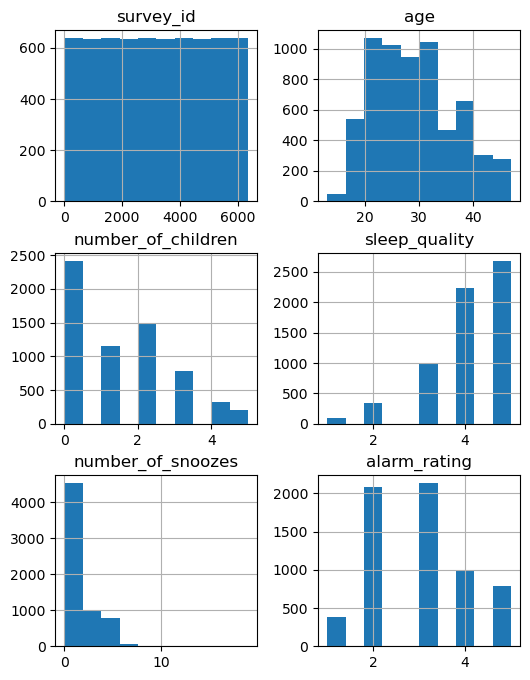

In [35]:
df.hist(figsize = (6, 8))

In [37]:
import seaborn as sns

<Axes: xlabel='number_of_snoozes'>

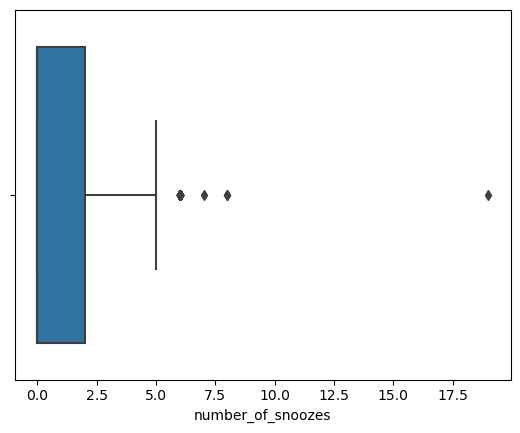

In [40]:
sns.boxplot(x = df.number_of_snoozes)

In [41]:
df.number_of_snoozes.value_counts()

0     3300
1     1229
2      693
4      427
5      345
3      309
6       59
8        2
19       1
7        1
Name: number_of_snoozes, dtype: int64

In [42]:
df = df[df.number_of_snoozes < 19]

In [43]:
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,lightly active,3.0,3,3
2,3,18,0,lightly active,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6361,6362,27,2,active,5.0,0,5
6362,6363,31,1,lightly active,4.0,0,4
6363,6364,26,0,lightly active,5.0,0,3
6364,6365,27,1,active,5.0,0,3


## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [44]:
#missing data
df[df.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [46]:
#duplicated data
df[df.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


array([[<Axes: title={'center': 'survey_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'number_of_children'}>,
        <Axes: title={'center': 'sleep_quality'}>],
       [<Axes: title={'center': 'number_of_snoozes'}>,
        <Axes: title={'center': 'alarm_rating'}>]], dtype=object)

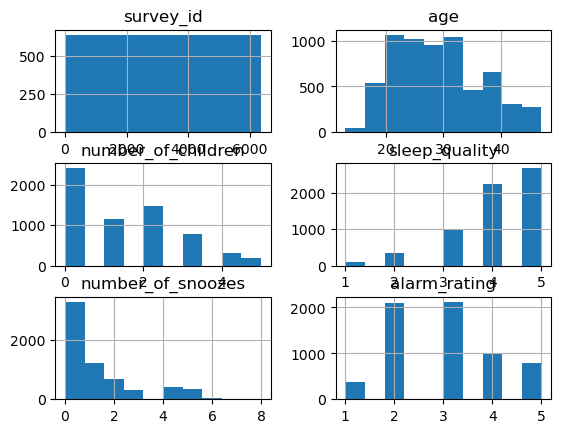

In [48]:
#outliers
df.hist()

## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [ ]:
# Create a “Total Spend” column that includes both the pen cost and shipping cost for each sale
# Create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise

In [74]:
pen_sale = pd.read_excel('../Data/Pen Sales Data.xlsx')

In [75]:
pen_sale.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...


In [76]:
pen_sale['total_cost'] = pen_sale['Pen Cost'] + pen_sale['Shipping Cost']

In [77]:
import numpy as np

In [78]:
pen_sale['Free Shipping'] = np.where(pen_sale['Shipping Cost'] == 0.00, 'Yes', 'No')

In [79]:
pen_sale.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,total_cost,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No


## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [80]:
# Calculate the number of days between the purchase and delivery date for each sale
# Save it as a new column called “Delivery Time”
# What were the average days from purchase to delivery?

In [81]:
pen_sale.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,total_cost,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No


In [82]:
pen_sale["Dilevery Time"] = pen_sale['Delivery Date'] - pen_sale['Purchase Date']

In [83]:
pen_sale["Dilevery Time"].mean()

Timedelta('3 days 05:45:36')

## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [84]:
# Split the reviews on the “|” character to create two new columns: “User Name” and “Review Text”
# Create a “Leak or Spill” column that flags the reviews that mention either “leak” or “spill”

In [85]:
pen_sale.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,total_cost,Free Shipping,Dilevery Time
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days


In [86]:
pen_sale[['User Name', 'Review Text']] = pd.DataFrame(pen_sale.Review.str.split("|").to_list())

In [87]:
pen_sale.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,total_cost,Free Shipping,Dilevery Time,User Name,Review Text
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane..."
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m..."
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an..."


In [91]:
pen_sale['Leak or Spill'] = pen_sale["Review Text"].str.contains('spill|leak', regex=True)

In [92]:
pen_sale.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,total_cost,Free Shipping,Dilevery Time,User Name,Review Text,Leak or Spill
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat...",True
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane...",False
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m...",False
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...,False
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an...",False
